# Workbook

Use this notebook to complete the exercises throughout the workshop.

#### Table of Contents
- [Section 1 &ndash; Getting Started with Pandas](#Section-1)
- [Section 2 &ndash; Data Wrangling](#Section-2)
- [Section 3 &ndash; Data Visualization](#Section-3)

---

### Section 1

#### Exercise 1.1
##### Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

#### Exercise 1.2
##### Find the dimensions (number of rows and number of columns) in the data.

#### Exercise 1.3
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

#### Exercise 1.4
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

---

### Section 2

#### Exercise 2.1
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [5]:
import pandas as pd
import numpy as np


from google.colab import files
#files = files.upload()


meteorites = pd.read_csv("Meteorite_Landings.csv")

meteorites.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [6]:
mask = meteorites.columns.str.contains('reclat|reclong|GeoLocation', regex = True)

columns_to_drop = meteorites.columns[mask]

columns_to_drop

Index(['reclat', 'reclong', 'GeoLocation'], dtype='object')

In [7]:
meteorites = meteorites.drop(columns=columns_to_drop)


meteorites.head()

,name,id,nametype,recclass,mass (g),fall,year
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM


In [8]:
meteorites = meteorites.rename(
    columns={
        'mass (g)':'mass'
    }
)

meteorites.head()

,name,id,nametype,recclass,mass,fall,year
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM


In [9]:
meteorites = meteorites.sort_values('mass', ascending=False)


meteorites.head()

,name,id,nametype,recclass,mass,fall,year
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM


#### Exercise 2.2
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [12]:
meteorites.dtypes
#meteorites['year'] = meteorites['year'].str.slice(start=6, stop=10)

meteorites.head()


,name,id,nametype,recclass,mass,fall,year
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,1818
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,1891
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,1898


In [13]:
meteorites[['year']] = meteorites[['year']].apply(pd.to_numeric)

meteorites[['year']] = meteorites[['year']].fillna(0).astype(int)




meteorites.dtypes
meteorites.head()


,name,id,nametype,recclass,mass,fall,year
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,1818
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,1891
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,1898


In [14]:
meteorites['pre_1970'] = np.where(meteorites['year'] < 1970, True, False)

meteorites.head()

,name,id,nametype,recclass,mass,fall,year,pre_1970
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920,True
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,1818,True
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575,True
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,1891,True
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,1898,True


In [15]:
#meteorites = meteorites.set_index('id')

meteorites = meteorites.sort_index()

meteorites.head()


,name,nametype,recclass,mass,fall,year,pre_1970
id,,,,,,,
1,Aachen,Valid,L5,21.0,Fell,1880,True
2,Aarhus,Valid,H6,720.0,Fell,1951,True
4,Abajo,Valid,H5,331.0,Found,1982,False
5,Abbott,Valid,H3-6,21100.0,Found,1951,True
6,Abee,Valid,EH4,107000.0,Fell,1952,True


In [16]:
range = meteorites.loc[10036:10041]


range

# No entry with an id of 10040

,name,nametype,recclass,mass,fall,year,pre_1970
id,,,,,,,
10036,Enigma,Valid,H4,94.0,Found,1967,True
10037,Enon,Valid,"Iron, ungrouped",763.0,Found,1883,True
10038,Enshi,Valid,H5,8000.0,Fell,1974,False
10039,Ensisheim,Valid,LL6,127000.0,Fell,1491,True
10041,Épinal,Valid,H5,277.0,Fell,1822,True


#### Exercise 2.3
##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

In [17]:
meteorites_year = meteorites.copy()

meteorites_year['year'] = pd.to_numeric(meteorites_year['year'], errors='coerce')

meteorites_year = meteorites_year[(meteorites_year['year'] >= 2005) & (meteorites_year['year'] <= 2009)]

meteorites_year.head()

,name,nametype,recclass,mass,fall,year,pre_1970
id,,,,,,,
31271,Northwest Africa 3147,Valid,Eucrite,290.00,Found,2005,False
31286,Pecora Escarpment 01001,Valid,LL5,19.50,Found,2005,False
31921,Northwest Africa 901,Valid,H5,278.00,Found,2005,False
32483,Northwest Africa 3151,Valid,Brachinite,1500.00,Found,2005,False
32766,Lucerne Valley 050,Valid,H4,6.85,Found,2005,False


In [18]:
melted_data = pd.melt(meteorites_year, id_vars=['year', 'fall'], value_vars=['mass'])

melted_data.head()

,year,fall,variable,value
0,2005,Found,mass,290.00
1,2005,Found,mass,19.50
2,2005,Found,mass,278.00
3,2005,Found,mass,1500.00
4,2005,Found,mass,6.85


In [19]:
melted_data = melted_data.pivot_table(index=['year', 'fall'], values='value', aggfunc=['count', 'quantile'])

melted_data.head()

count  quantile
           value     value
year fall                 
2005 Found   874   181.295
2006 Fell      5  4000.000
     Found  2450    20.700
2007 Fell      8   489.000
     Found  1181    31.400

In [20]:
melted_data.columns = ['_'.join(col).strip() for col in melted_data.columns.values]

melted_data.head()

count_value  quantile_value
year fall                              
2005 Found          874         181.295
2006 Fell             5        4000.000
     Found         2450          20.700
2007 Fell             8         489.000
     Found         1181          31.400

In [21]:
melted_data.columns = ['count', 'mass_95th_percentile']

melted_data.head()

count  mass_95th_percentile
year fall                              
2005 Found    874               181.295
2006 Fell       5              4000.000
     Found   2450                20.700
2007 Fell       8               489.000
     Found   1181                31.400

In [22]:
melted_data1  = melted_data.reset_index()

melted_data1.head()

,year,fall,count,mass_95th_percentile
0,2005,Found,874,181.295
1,2006,Fell,5,4000.000
2,2006,Found,2450,20.700
3,2007,Fell,8,489.000
4,2007,Found,1181,31.400


#### Exercise 2.4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, compare summary statistics of the mass column for the meteorites that were found versus observed falling.

In [23]:
comparison = meteorites.groupby('fall').describe()['mass']


comparison

,count,mean,std,min,25%,50%,75%,max
fall,,,,,,,,
Fell,1075.0,47070.715023,717067.125826,0.1,686.00,2800.0,10450.0,23000000.0
Found,44510.0,12461.922983,571105.752311,0.0,6.94,30.5,178.0,60000000.0


#### Exercise 2.5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [49]:
import pandas as pd



from google.colab import files
#files = files.upload()


taxis = pd.read_csv("2019_Yellow_Taxi_Trip_Data.csv")

taxis.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


In [50]:
taxis = taxis.rename(
    columns={
        'tpep_pickup_datetime':'pickup',
        'tpep_dropoff_datetime': 'dropoff'

    }
)

taxis.head()

,vendorid,pickup,dropoff,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


In [51]:
taxis[['pickup', 'dropoff']] = \
    taxis[['pickup', 'dropoff']].apply(pd.to_datetime)
taxis.dtypes

,0
vendorid,int64
pickup,datetime64[ns]
dropoff,datetime64[ns]
passenger_count,int64
trip_distance,float64
ratecodeid,int64
store_and_fwd_flag,object
pulocationid,int64
dolocationid,int64
payment_type,int64


In [59]:

hourly_data = taxis.resample('h', on='dropoff').agg({
    'trip_distance': 'sum',
    'fare_amount': 'sum',
    'tolls_amount': 'sum',
    'tip_amount': 'sum'
})



top_5_hours = hourly_data.nlargest(5, 'tip_amount')
top_5_hours


,trip_distance,fare_amount,tolls_amount,tip_amount
dropoff,,,,
2019-10-23 16:00:00,10676.95,67797.76,699.04,12228.64
2019-10-23 17:00:00,16052.83,70131.91,4044.04,12044.03
2019-10-23 18:00:00,3104.56,11565.56,1454.67,1907.64
2019-10-23 15:00:00,14.34,213.50,0.00,51.75
2019-10-23 19:00:00,98.59,268.00,24.48,25.74


---

### Section 3

#### Exercise 3.1
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt


from google.colab import files
#files = files.upload()


travelers = pd.read_csv("tsa_melted_holiday_travel.csv")

travelers.head()



,date,year,travelers,holiday
0,2019-01-01,2019,2126398.0,New Year's Day
1,2019-01-02,2019,2345103.0,New Year's Day
2,2019-01-03,2019,2202111.0,NaN
3,2019-01-04,2019,2150571.0,NaN
4,2019-01-05,2019,1975947.0,NaN


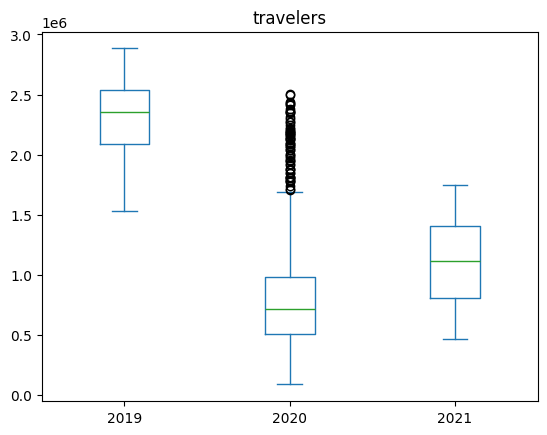

In [81]:

travelers.plot(column='travelers', by='year', kind='box')
plt.show()


#### Exercise 3.2
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

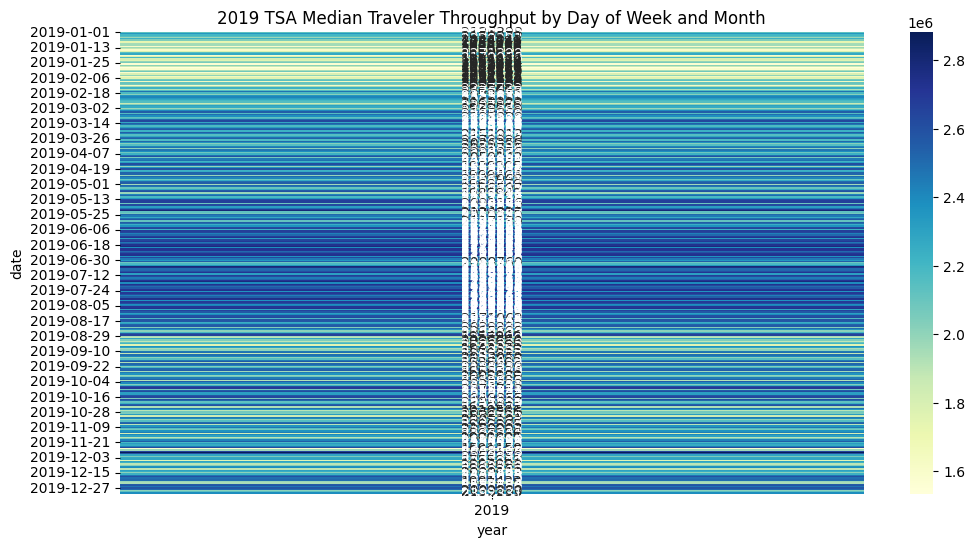

In [67]:
import seaborn as sns

travelers_2019 = travelers[travelers['year'] == 2019]


travelers_pivot = travelers_2019.pivot_table(index='date', columns='year', values='travelers', aggfunc='median')


plt.figure(figsize=(12, 6))
sns.heatmap(travelers_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('2019 TSA Median Traveler Throughput by Day of Week and Month')
plt.show()


#### Exercise 3.3
##### Annotate the medians in the box plot from *[Exercise 3.1](#Exercise-3.1)*. Hint: The `x` coordinates will be 1, 2, and 3 for 2019, 2020, and 2021, respectively. Alternatively, to avoid hardcoding values, you can use the `Axes.get_xticklabels()` method, in which case you should look at the [documentation](https://matplotlib.org/stable/api/text_api.html) for the `Text` class.

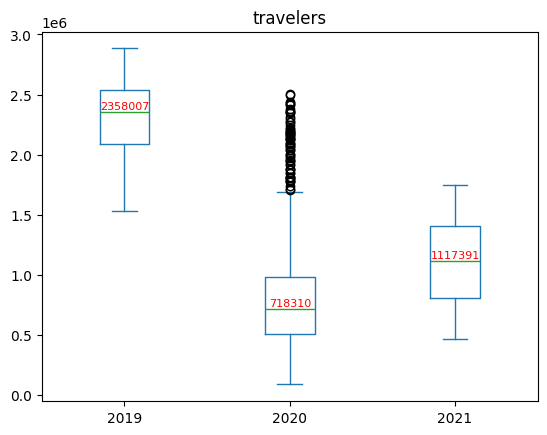

In [92]:

travelers.plot(column='travelers', by='year', kind='box')


ax = plt.gca()


medians = travelers.groupby('year')['travelers'].median()


for i, year in enumerate(medians.index):
  y = medians[year]
  ax.annotate(f'{y:.0f}', xy=(i + 1, y), xytext=(i + 1, y + 5000), ha='center', va='bottom', fontsize=8, color='red')

plt.show()
